In [1]:
#A correlation coefficient is a statistical measure of the degreeto which change to the value of one variable predict change to the value of another 
#identifing the relationship between two attributes are association between attributes 
#two variables should be a numerical variables 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
air = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\AirPassengers.csv")

In [3]:
air.shape

(80, 9)

In [4]:
air.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [7]:
air.drop_duplicates().shape

(80, 9)

In [8]:
#missing values check.
air.isnull().sum()


Week_num                        0
Passengers                      0
Promotion_Budget                0
Service_Quality_Score           0
Holiday_week                    0
Delayed_Cancelled_flight_ind    0
Inter_metro_flight_ratio        0
Bad_Weather_Ind                 0
Technical_issues_ind            0
dtype: int64

In [9]:
#iqr method for outlier
iqr = air.quantile(0.75)-air.quantile(0.25)
lo = air.quantile(0.25)-1.5*iqr
uo = air.quantile(0.75)+1.5*iqr
print("iqr \n" ,iqr)
print("\n")
print("lower outlier cutoff point \n", lo)
print("\n")
print("upper outlier cutoff point \n", uo )

iqr 
 Week_num                        39.500000
Passengers                   12440.000000
Promotion_Budget            170702.000000
Service_Quality_Score            1.677303
Inter_metro_flight_ratio         0.192500
dtype: float64


lower outlier cutoff point 
 Week_num                       -38.500000
Passengers                   17764.000000
Promotion_Budget            261838.500000
Service_Quality_Score           -0.584374
Inter_metro_flight_ratio         0.321250
dtype: float64


upper outlier cutoff point 
 Week_num                       119.500000
Passengers                   67524.000000
Promotion_Budget            944646.500000
Service_Quality_Score            6.124836
Inter_metro_flight_ratio         1.091250
dtype: float64


In [10]:
air.describe().T

,count,mean,std,min,25%,50%,75%,max
Week_num,80.0,40.500000,23.237900,1.00000,20.75000,40.50000,60.250000,80.0
Passengers,80.0,44745.025000,11267.155215,28700.00000,36424.00000,43144.00000,48864.000000,81228.0
Promotion_Budget,80.0,625422.350000,156514.349317,365680.00000,517891.50000,597919.00000,688593.500000,1108254.0
Service_Quality_Score,80.0,2.781168,1.000204,0.85536,1.93158,3.10812,3.608883,4.0
Inter_metro_flight_ratio,80.0,0.693000,0.158045,0.38000,0.61000,0.72000,0.802500,0.9


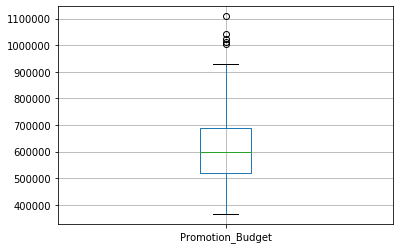

In [11]:
air.boxplot(["Promotion_Budget"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F1A8D1788>]],
      dtype=object)

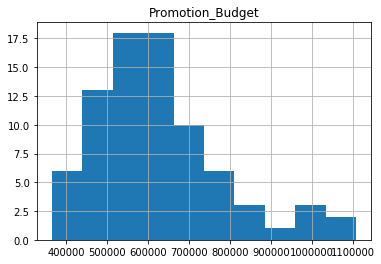

In [12]:
air.hist(["Promotion_Budget"])

In [13]:
air.skew()

Week_num                    0.000000
Passengers                  1.314496
Promotion_Budget            1.091851
Service_Quality_Score      -0.512569
Inter_metro_flight_ratio   -0.489090
dtype: float64

In [14]:
uo

Week_num                       119.500000
Passengers                   67524.000000
Promotion_Budget            944646.500000
Service_Quality_Score            6.124836
Inter_metro_flight_ratio         1.091250
dtype: float64

In [15]:
air.quantile(.93)

Week_num                        74.470000
Passengers                   63587.580000
Promotion_Budget            903380.660000
Service_Quality_Score            3.946942
Inter_metro_flight_ratio         0.900000
Name: 0.93, dtype: float64

In [16]:
#outlier treatment
air["Promotion_Budget"]=np.where(air["Promotion_Budget"]>944646, 944646, air["Promotion_Budget"])

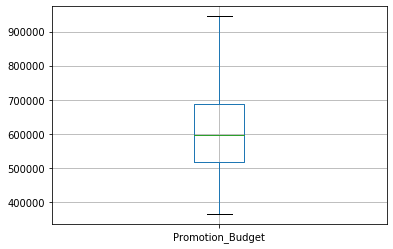

In [17]:
air.boxplot(["Promotion_Budget"])

In [18]:
air.skew()

Week_num                    0.000000
Passengers                  1.314496
Promotion_Budget            0.698940
Service_Quality_Score      -0.512569
Inter_metro_flight_ratio   -0.489090
dtype: float64

In [19]:
air1 = air._get_numeric_data()
air1

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,1,37824,517356,4.00000,0.70
1,2,43936,646086,2.67466,0.80
2,3,42896,638330,3.29473,0.90
3,4,35792,506492,3.85684,0.40
4,5,38624,609658,3.90757,0.87
...,...,...,...,...,...
75,76,66934,927696,1.07138,0.84
76,77,81228,944646,0.85536,0.90
77,78,43288,638162,3.08191,0.62
78,79,43834,636636,2.75382,0.79


In [20]:
#Drop columns which is not required
air1.drop(["Week_num"], axis=1, inplace=True)

In [21]:
air1.head()

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,37824,517356,4.00000,0.70
1,43936,646086,2.67466,0.80
2,42896,638330,3.29473,0.90
3,35792,506492,3.85684,0.40
4,38624,609658,3.90757,0.87


In [22]:
#two variables are having the liner Association : the relationship between ither possitive or negitive relation that is called as liner association
#liner association: if x1 is incresing x2 also incresing (positive association)


#To compare two numerical variables, we use scatter plot 

Text(0, 0.5, 'promotion_budget')

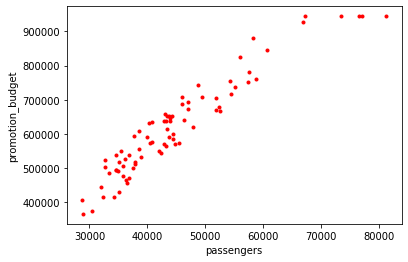

In [23]:
plt.plot(air1["Passengers"],air1["Promotion_Budget"],"r.")
plt.xlabel("passengers")
plt.ylabel("promotion_budget")

Text(0, 0.5, 'promotion_budget')

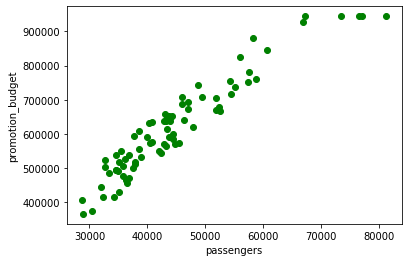

In [24]:
plt.scatter(air1["Passengers"],air1["Promotion_Budget"],color="g")
plt.xlabel("passengers")
plt.ylabel("promotion_budget")

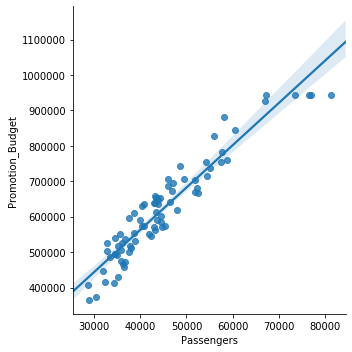

In [25]:
sns.lmplot(x="Passengers",y="Promotion_Budget",data=air1) #possitive association & DIrectly proposion 

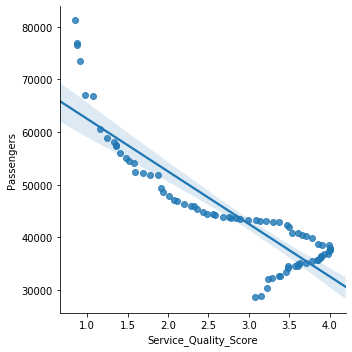

In [26]:
sns.lmplot(x="Service_Quality_Score",y="Passengers", data=air1) #negative relationship & inverson propossion

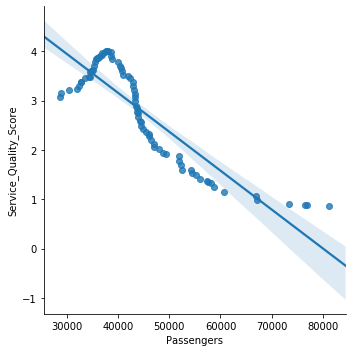

In [27]:
sns.lmplot(x="Passengers",y="Service_Quality_Score", data=air1)

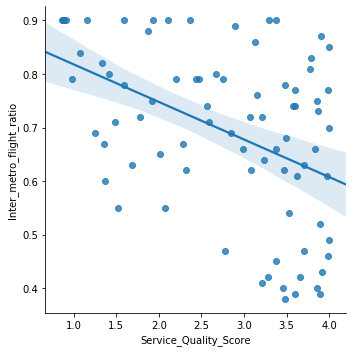

In [28]:
sns.lmplot(x="Service_Quality_Score",y="Inter_metro_flight_ratio",data=air1)

In [29]:
np.cov(air1["Passengers"],air1["Promotion_Budget"])

array([[1.26948787e+08, 1.51491066e+09],
       [1.51491066e+09, 2.00533729e+10]])

In [30]:
np.cov(air1["Passengers"],air1["Promotion_Budget"])[0][1]

1514910657.2829113

In [31]:
np.cov(air1["Passengers"],air1["Promotion_Budget"])[0][0]

126948786.63227846

In [32]:
np.cov(air1["Passengers"],air1["Promotion_Budget"])[1][1]

20053372877.412025

In [33]:
np.cov(air1["Passengers"],air1["Promotion_Budget"])[0][0]

126948786.63227846

In [34]:
#user define function for covarriance
def cov(x,y):
    a1=x-np.mean(x)
    b1=y-np.mean(y)
    c1=sum(a1*b1)
    cnt=(len(x)-1)
    cov_sample = c1/cnt
    print("covariance",cov_sample)
    

In [35]:
a=np.array(air1["Passengers"])
b=np.array(air1["Promotion_Budget"])

In [36]:
cov(x=a,y=b)

covariance 1514910657.2829113


In [37]:
abc = np.cov(air1["Passengers"],air1["Promotion_Budget"])

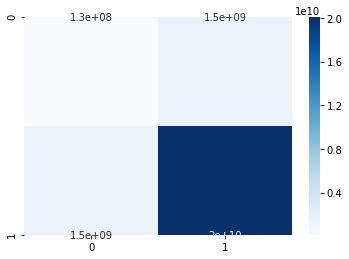

In [38]:
sns.heatmap(abc,annot=True,cmap="Blues")

In [ ]:
#The drowback of co-variance is two variables must have the same units
#but in the real work have defferent variables ex: loan amount , inrest rate, princeple amount 
 #two overcome this problam we have to use the correlation
    
    #correlation: by stanarization the attributes appying the standered deviation to covariance
    
    #Correlation(r) = cov(x,y)/std(x)*std(y)

    #Co-variance provide the direction of attribtes 
    
    #correlation provide the direction and strenth of the given data
    #the range of co-relation value(-1<=r<=1) r:coefficient of correlation
    #1: is exact possitive correlation as one variable changes predominatly other attribute also will change 
    #-1: exact nagative correlaction between attributs, the relationship between two variables are invescly propotion to each other
    #what is the inversal meaning: one variable incresing other variable decresing 

In [40]:
air.columns

Index(['Week_num', 'Passengers', 'Promotion_Budget', 'Service_Quality_Score',
       'Holiday_week', 'Delayed_Cancelled_flight_ind',
       'Inter_metro_flight_ratio', 'Bad_Weather_Ind', 'Technical_issues_ind'],
      dtype='object')

(array([ 300000.,  400000.,  500000.,  600000.,  700000.,  800000.,
         900000., 1000000.]), <a list of 8 Text xticklabel objects>)

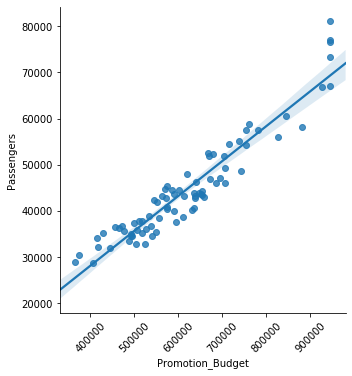

In [42]:
sns.lmplot(x='Promotion_Budget', y='Passengers', data=air)
plt.xticks(rotation=45)

(array([ 300000.,  400000.,  500000.,  600000.,  700000.,  800000.,
         900000., 1000000.]), <a list of 8 Text xticklabel objects>)

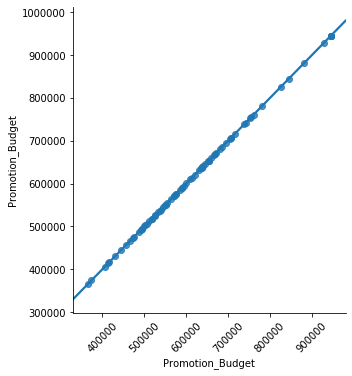

In [43]:
sns.lmplot(x='Promotion_Budget', y='Promotion_Budget', data=air)
plt.xticks(rotation=45)

In [44]:
#Correlation range:
        #1: excat possitive correlation
        #0-0.25: negligable positive correlation
        #0.25-0.5: week possitive correlation
        #0.5-0.75: modarate possitive correlation
        #0.75-1 : strong possitive correlation
        #0:- there is No liner relationship between attributes 
        
        #-0to-0.25: negligable negative correlation
        #-0.25to-0.5: week neative correlation
        #-0.5to-0.75: modarate negative correlation
        #-0.75to-1: strong negative correlation
        #-1: exact nagative correlation

In [45]:
air1=air._get_numeric_data()

In [46]:
air1.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,1,37824,517356,4.00000,0.70
1,2,43936,646086,2.67466,0.80
2,3,42896,638330,3.29473,0.90
3,4,35792,506492,3.85684,0.40
4,5,38624,609658,3.90757,0.87


In [48]:
#Droping the week_num
air1.drop(["Week_num"], axis=1,inplace=True)

In [49]:
air1

,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
0,37824,517356,4.00000,0.70
1,43936,646086,2.67466,0.80
2,42896,638330,3.29473,0.90
3,35792,506492,3.85684,0.40
4,38624,609658,3.90757,0.87
...,...,...,...,...
75,66934,927696,1.07138,0.84
76,81228,944646,0.85536,0.90
77,43288,638162,3.08191,0.62
78,43834,636636,2.75382,0.79


In [51]:
abc=np.corrcoef(air1["Passengers"],air1["Promotion_Budget"])
print(abc)

[[1.         0.94946515]
 [0.94946515 1.        ]]


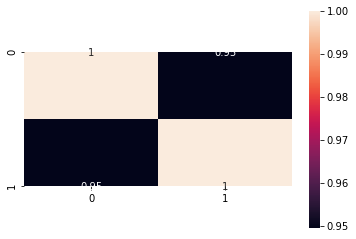

In [52]:
sns.heatmap(abc, annot=True, square=True)

In [56]:
def corr_cal(x,y):
    a1=sum((x-np.mean(x))*(y-np.mean(y)))
    xy=(np.std(x)*np.std(y))
    lenght= (len(x)-1)
    cov=a1/lenght
    corr=cov/xy
    print("covariance",cov)
    print("correlation", corr)

In [57]:
corr_cal(x=np.array(air["Passengers"]), y=np.array(air1["Promotion_Budget"]))

covariance 1514910657.2829113
correlation 0.9614836971287406
